In [1]:
from common import utils
import random
u=utils(False)
!rm -rf ./systeme/
!tar xf systeme.tar


Ce cours a été régénéré le 2018-08-23 16:49:18.362224


# Les fichiers

## De l’information au stockage
Les informations utilisées dans un ordinateur sont stockées dans la *mémoire de masse*, qui se distingue
de la *mémoire vive* par sa résistance à l’extinction et de la *mémoire morte* (et plus tard, du *firmware*) par
sa mutabilité.

Les performances des systèmes de stockage de masse sont meilleures chaques années, mais l’ordre de
grandeur reste la ms ou 100 μs.
### De l’information au fichier
L’information est découpée en petites unités qui s’appellent des fichiers, sémantiquement cohérentes —
ce sont des informations qui « vont ensemble ». Ces éléments de base du stockage informatique peuvent
ne contenir que très peu d’information ou représenter plusieurs Go de données par fichier.
Un fichier est lié à la façon dont on y accède (son nom et son chemin), mais nous verrons que ce n’est pas
un identifiant : il peut y avoir plusieurs accès différents à un même fichier (liens).

Un fichier est une suite d'octets (et pas de bits : il y a toujours un nombre entier d'octets).

### Nom et chemin
Le nom d'un fichier permet de le distinguer parmi un ensemble de fichiers rangés ensemble. Si on y ajoute le chemin d'accès, on a alors un moyen d'accéder au fichier et de le distinguer parmi tous les autres.

Dans les systèmes de fichiers modernes, on distingue toujours au moins deux types d'éléments :

  * les fichiers contiennent des données uniquement
  * les répertoires servent à l'organisation et contiennent soit des fichiers, soit d'autres répertoires.

La suite de répertoires à traverser pour accéder à un fichier est appelé le chemin d'accès. Au sein d'un même répertoire, il n'y a pas deux fichiers qui portent le même nom.

On a donc la possibilité d'accéder à un fichier une fois que l'on connait son chemin complet (ou nom complet): la racine d'où l'on part, les répertoires à traverser, et dans le répertoire final, le nom à utiliser.

Les répertoires à traverser sont séparés par le séparateur de chemin. Sous Linux et Unix, le séparateur est `/` alors que sous Windows c'est `\`.

Les noms de fichier ont souvent des règles de caractères interdits (notamment le séparateur de chemin est interdit). Souvent, pour aider le système ou l'utilisateur à deviner l'utilisation d'un fichier (le type de données), une extension est ajoutée séparée du corps du nom par un `.`. Sous Windows, l'extension est même obligatoire (et un nom sans extension désigne forcément un répertoire).

Exemples de chemin complet:

    C:\System\Program Files\Backup\backup.exe
    /usr/bin/stellarium
    /home/user/.local/share/Game Stand/README.pdf

### Choisir un nom

Un nom de fichier doit respecter deux sortes d'obligations

  * Obligations techniques selon le système d'exploitation (par exemple extension sous Windows, caractères interdits, taille)
  * Obligation d'information pour les humains ; comparer par exemple `texte.pdf`, `devoir-dubacq.pdf` (nom de l'enseignant), `devoir-martin.pdf` (nom de l'élève), `devoir-anglais-martin.pdf`…

Par ailleurs, certains systèmes différencient les noms selon la casse (distinction majuscules/minuscules sous Linux, confondu sous Windows et OSX).

## Organisation des données

Les données sont organisées en répertoires pour les ranger. C'est vrai de l'organisation de chaque utilisateur, mais aussi du système en général. Un système actuel compte facilement plus de 100 000 fichiers.

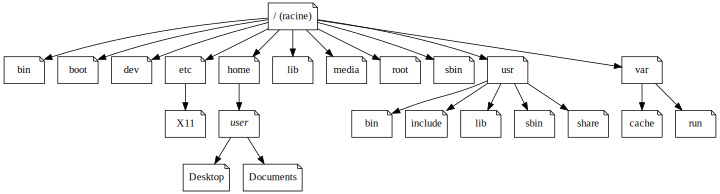

In [2]:
from graphviz import Digraph
import os.path

nodes=['/','/bin','/boot','/dev','/etc','/etc/X11','/home','/home/user','/home/user/Documents','/home/user/Desktop','/lib','/media','/usr','/usr/bin','/root','/sbin','/usr/include','/usr/lib','/usr/sbin','/usr/share','/var','/var/cache','/var/run']
shapes={}
labels={'':'/ (racine)','user':'<<i>user</i>>'}
nodes.sort()

def nodesfromlist(files):
    t=set()
    t=t.union({'/'})
    for n in files:
        p=''    
        for f in n.split("/"):
            if len(f)>0:
                p=p+'/'+f
                t=t.union({p})
    nodes=sorted(list(t))
    return(nodes)

def labelfrompath(node):
    label=os.path.basename(node)
    if label in labels:
        label=labels[label]
    return(label)

def treefromnodes(nodes,files,inside=True):
    dot = Digraph(comment='Tree')
    dot.attr(size='10')
    for node in nodes:
        shape='tab'
        if node in files:
            shape='note'
        if node in shapes:
            shape=shapes[node]
        if inside or node=="/":
            dot.node(node,labelfrompath(node),shape=shape)
        else:
            dot.node(node,"",shape=shape)
    for nodex in nodes:
        if nodex != '/':
            root='/'
            for node in nodes:
                if nodex.startswith(node) and nodex != node:
                    root=node
            if inside:
                dot.edge(root,nodex)
            else:
                dot.edge(root,nodex,label=labelfrompath(nodex))
    return(dot)

dot=treefromnodes(nodesfromlist(nodes),nodes)
display(dot)

### La notion de chemin

Le chemin est une suite des répertoires à traverser pour atteindre un fichier, à partir d'un point de départ donné.

Il existe deux sortes de chemins :

  * Les chemins absolus, qui partent de la racine
  * Les chemins relatifs, qui partent d'un autre répertoire (qu'on appelle en général le *répertoire courant*).

On cherche en général le chemin *canonique* c'est-à-dire celui qui est le plus court. En effet, chaque lien de parent vers enfant (par exemple `Documents` est dans `user`) peut-être parcouru dans le sens inverse et donc on pourrait faire un chemin qui va dans des endroits totalement inutiles et en revient avant d'aller vers la bonne cible.

Il se trouve que sous Windows comme sous Unix, la désignation du parent est la même et est `..`. *Attention : deux points, pas trois ni un.*

Dans l'exemple ci-dessus, le chemin de `X11` à `Documents` est `../../home/user/Documents`. Le chemin absolu vers `Desktop` est `/home/user/Desktop`, et le chemin absolu vers `bin` est... variable selon le `bin` considéré ! En effet, deux répertoires ou fichiers peuvent porter le même nom s'ils ne sont pas dans le même répertoire !

#### Activité : Chemins relatifs et absolus

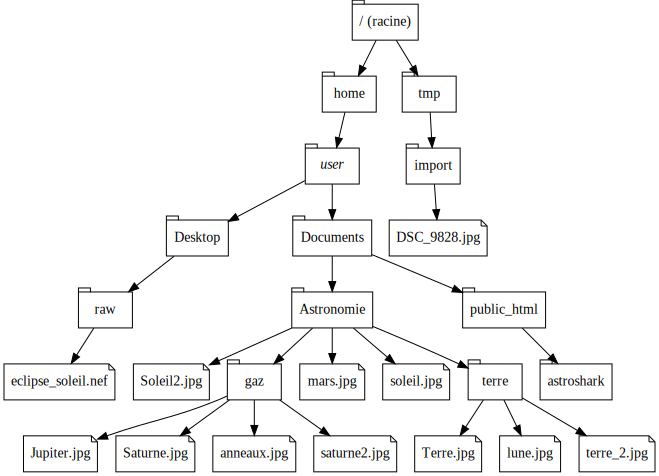

Dans le graphique ci-dessous, donnez le chemin relatif ou absolu pour atteindre les fichiers spécifiés:

`Terre.jpg`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin absolu est `/home/user/Documents/Astronomie/terre/Terre.jpg`

`Jupiter.jpg`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin absolu est `/home/user/Documents/Astronomie/gaz/Jupiter.jpg`

Atteindre `mars.jpg` depuis `/home/user/Documents/Astronomie/`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin relatif est `mars.jpg`

Atteindre `saturne2.jpg` depuis `/home/user/Desktop/`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin relatif est `../Documents/Astronomie/gaz/saturne2.jpg`

In [3]:
import os.path
import re
files=[
        "/home/user/Documents/Astronomie/soleil.jpg",
        "/home/user/Documents/Astronomie/Soleil2.jpg",
        "/home/user/Documents/Astronomie/terre/lune.jpg",
        "/home/user/Documents/Astronomie/terre/Terre.jpg",
        "/home/user/Documents/Astronomie/terre/terre_2.jpg",
        "/home/user/Documents/Astronomie/mars.jpg",
        "/home/user/Documents/Astronomie/gaz/Jupiter.jpg",
        "/home/user/Documents/Astronomie/gaz/Saturne.jpg",
        "/home/user/Documents/Astronomie/gaz/saturne2.jpg",
        "/home/user/Documents/Astronomie/gaz/anneaux.jpg",
        "/home/user/Desktop/raw/eclipse_soleil.nef",
        "/home/user/Documents/public_html/astroshark/",
        "/tmp/import/DSC_9828.jpg"
      ]
froms = [
    "/home/user/Documents/public_html/astroshark/",
    "/tmp/",
    "/home/user/Desktop/",
    "/home/user/Documents/Astronomie/",
    "/home/user/Documents/"
]

nodes=nodesfromlist(files)
dot=treefromnodes(nodes,files)
u.activite('Chemins relatifs et absolus')
display(dot)
u.mark('Dans le graphique ci-dessous, donnez le chemin relatif ou absolu pour atteindre les fichiers spécifiés:')
for i in [1,2]:
    p=random.choice(files)
    files.remove(p)
    u.mark('`'+os.path.basename(p)+'`')
    u.solutioncheck('Chemin ','Le chemin absolu est `'+p+'`','Bravo!','Non, regardez bien à partir de la racine.')
for i in [1,2]:
    fromd=random.choice(froms)
    froms.remove(fromd)
    p=random.choice(files)
    files.remove(p)
    u.mark('Atteindre `'+os.path.basename(p)+'` depuis `'+fromd+'`')
    u.solutioncheck('Chemin ','Le chemin relatif est `'+os.path.relpath(p,fromd)+'`','Bravo!','Non, regardez bien à partir de `'+fromd+'`.')


### Circulation à double sens

Tous les répertoires sont munis de deux raccourcis spéciaux.

Le premier permet de remonter vers le répertoire parent et a été mentionné ci-dessus : `..`. Ainsi le répertoire `/home/usager/..` est en fait le même répertoire que `/home`.
    
Le deuxième permet de rester au même endroit et est désigné par un simple `.`. Ainsi `/home/./././.` est la même chose que `/home`.

Cette circulation à double sens peut être représentée comme ci-dessous. Attention, seuls les répertoires sont munis de cette liaison vers le parent : pas les fichiers.

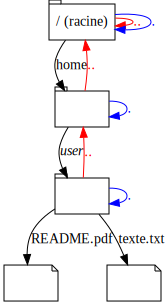

Pour mieux comprendre les chemins, il est parfois plus facile d'imaginer que les éléments de chemin sont sur les liens entre répertoires ou fichiers que sur les fichiers eux-mêmes, puisqu'on peut arriver au répertoire `home` avec le nom `home` (depuis la racine) ou avec le nom `..` (depuis `user`).

In [4]:
files=[
        "/home/user/texte.txt",
        "/home/user/README.pdf"
      ]
nodes=nodesfromlist(files)
dot=treefromnodes(nodes,files,inside=False)
dot.edge("/home/user","/home",label="..",color="red",fontcolor="red")
dot.edge("/home","/",label="..",color="red",fontcolor="red")
dot.edge("/","/",label="..",color="red",fontcolor="red")
for p in ["/","/home","/home/user"]:
    dot.edge(p,p,label=".",color="blue",fontcolor="blue")
display(dot)
u.mark("Pour mieux comprendre les chemins, il est parfois plus facile d'imaginer que les éléments de chemin sont sur les liens entre répertoires ou fichiers que sur les fichiers eux-mêmes, puisqu'on peut arriver au répertoire `home` avec le nom `home` (depuis la racine) ou avec le nom `..` (depuis `user`).")


### Répertoire personnel

Pour gérer les données personnelles des utilisateurs des systèmes informatiques, chaque utilisateur se voit attribuer quelque part un répertoire qui est « à lui ». Techniquement, ce répertoire n'a rien de très différent des autres, mais les permissions (concept qui sera vu plus tard) sont données de façon à ce que l'utilisateur en ait le contrôle.

Il est possible d'utiliser une abréviation qui est liée aux répertoires personnels des utilisateurs :
  * Si un `~xxx` au début d'un chemin n'est pas protégé, le `~xxx` est remplacé par le répertoire personnel de l'utilisateur `xxx`, souvent quelque chose qui ressemble à `/home/xxx` mais qui peut être plus compliqué (la correspondance utilisateur ↦ répertoire personnel est stocké dans l'ordinateur).

  * Si un `~` tout seul est au début d'un chemin (par exemple `~/Documents`) le `~` est remplacé par le répertoire personnel de l'utilisateur (cela donne par exemple `/home/usagers/1234567890/Documents`).
  


In [5]:
u.activite('Répertoire personnel')
from os.path import expanduser
home = expanduser("~")
if not u.interactif:
    home="(dépend de l'utilisateur)"
u.mark('Déterminez le chemin de votre répertoire personnel en utilisant la commande `echo` dans un terminal avec le bon argument.')
x=u.solutioncheck('Votre répertoire',home,'Tout à fait !',"Non, c'est "+home+". Avez vous essayé de taper echo ~ ?")
import pwd
user=random.choice([p[0] for p in pwd.getpwall()])
home = expanduser("~"+user)
if not u.interactif:
    home="(dépend de l'utilisateur)"
u.mark('Déterminez le chemin du répertoire personnel de `'+user+'` en utilisant la commande `echo` dans un terminal avec le bon argument.')
x=u.solutioncheck('Votre répertoire',home,'Tout à fait !',"Non, c'est "+home+". Avez vous essayé de taper echo ~ ?")


#### Activité : Répertoire personnel

Déterminez le chemin de votre répertoire personnel en utilisant la commande `echo` dans un terminal avec le bon argument.

Votre répertoire > `_____________________________________________________`

**Solution :** (dépend de l'utilisateur)

Déterminez le chemin du répertoire personnel de `nobody` en utilisant la commande `echo` dans un terminal avec le bon argument.

Votre répertoire > `_____________________________________________________`

**Solution :** (dépend de l'utilisateur)

### Répertoire courant

Tout processus (un programme s'exécutant dans le système) a un *répertoire courant*, qui est le répertoire qui est utilisé pour trouver la destination finale des chemins relatifs.

> **Exemple :** Par exemple, si un shell a comme répertoire courant `/home/user`, le chemin (relatif) `Documents/README.pdf` a pour chemin absolu `/home/user/Documents/README.pdf` et le chemin (relatif) `../jojozeboss/PASSWORD.txt` a pour chemin absolu `/home/user/../jojozeboss/PASSWORD.txt` ce qui est la même chose que `/home/jojozeboss/PASSWORD.txt`

Il est possible de changer le répertoire courant. Ça n'a aucun effet sur la structure des fichiers, seulement sur le processus.

La commande pour changer de répertoire est `cd CHEMIN`. Le chemin peut être un chemin absolu ou relatif, auquel cas il est relatif au répertoire courant avant la commande. Le répertoire courant peut être affiché par `pwd` (même s'il est souvent aussi codé pour s'afficher dans le prompt).

> **Exemple :** Si à la suite de l'exemple précédents, on fait `cd Documents`, alors le chemin relatif du premier document devient juste `README.pdf` ou `./README.pdf`. Le chemin absolu correspondant à `Documents/README.pdf` serait maintenant `/home/user/Documents/Documents/README.pdf`.

> **Syntaxe :** `cd CHEMIN` change le répertoire courant par le chemin CHEMIN.

> **Syntaxe :** `pwd` affiche le répertoire courant.

### Visualiser une arborescence et des fichiers

Les fichiers de type *texte* peuvent être vus directement dans le terminal, puisqu'une de ses fonctions est d'afficher du texte. Les autres fichiers doivent avoir recours à une application spécifique, qui utilisera le programme de gestion des fenêtres pour afficher le résultat (et éventuellement avoir une interaction avec).

Pour afficher un fichier de type *texte*, il suffit d'utiliser la commande `cat` ou la commande `less`. La première version se contentera de sortir les octets du fichier (quel qu'il soit) sous forme de texte dans le terminal ; la deuxième version propose si le fichier est trop long pour tenir sur un écran un système de pagination, où la barre d'espace permet de passer d'une *page* à une autre, et d'autres commandes sont disponibles (notamment *q* pour quitter la visualisation).

Les contenus qui ne sont pas du texte ne sont pas affichables directement dans le terminal. On peut utiliser `hexdump` (en particulier `hexdump -C`) pour afficher les octets qui constituent le fichier (ça peut s'écrire sous forme de texte), mais pas d'affichage graphique ; pour cela il faut faire appel à d'autres applications qui communiquent non pas avec le terminal, mais avec le système de fenêtres (par exemple `display` pour les images).

On ne peut pas *afficher* un répertoire : il ne contient pas de données au sens de ce qui constitue les fichiers comme défini au début du chapitre. On peut en revanche afficher son contenu (ainsi que certaines données liées aux fichiers, comme leur taille par exemple). Cela se fait par l'intermédiaire de la commande `ls` (abréviation de *list*). Donnée sans arguments, elle listera le répertoire courant. Elle a une énorme quantité d'options que nous verrons au fur et à mesure.

> **Syntaxe :** `ls [chemin] [...]` liste l'arborescence des chemins donnés en argument. S'il n'y a pas d'argument, la commande est équivalente à `ls .`. Si un chemin donné en argument est un fichier, son nom est affiché. Si un répertoire est désigné par l'un des chemins, alors le nom du répertoire est affiché, suivi des fichiers qu'il contient.

> **Syntaxe :** `cat chemin [...]`  affiche dans le terminal le contenu des fichiers sous forme de texte. Si les fichiers ne sont pas du texte, il est possible que l'affichage soit illisible, voire que certaines séquences rendent le terminal inutilisable. Dans ce cas, ne pas hésiter à utiliser la barre de menu `Terminal ▶ Réinitialiser`.

> **Syntaxe :** `less chemin [...]`  affiche dans le terminal le contenu des fichiers sous forme de texte avec des fonctionnalités de pagination.

> **Syntaxe :** `hexdump [-C] chemin`  affiche dans le terminal le contenu des fichiers sous forme de texte représentant les octets successifs. Il n'y a pas de risque de perturbation du terminal. Parce que le résultat peut être assez long, vous pouvez utiliser la formule magique `hexdump -C chemin_du_fichier | less` jusqu'à ce que le symbole `|` ait été expliqué un peu plus tard.

In [6]:
%%sh
# Exemple d'utilisation de ls et cat
rm -rf ./systeme/
tar xf systeme.tar
ls systeme systeme/Astronomie/session1 inventaire.txt

inventaire.txt

systeme:
Astronomie

systeme/Astronomie/session1:
eris.jpg
neptune.jpg
pluton.jpg
saturne.jpg
terre.jpg
uranus.jpg
venus.jpg


In [7]:
u.activite("Visualisation de fichiers")
u.mark('Dans un terminal, après s\'être rendu dans le bon dossier avec cd, taper `cat inventaire.txt`, `less inventaire.txt` et `hexdump -C inventaire.txt` \
pour comparer le comportement.')
u.activite("Exploration d'une arborescence")
u.mark("Un répertoire `systeme` a été créé dans le répertoire de votre notebook.")
u.mark("En utilisant la commande `ls` et éventuellement la commande `cd`, représentez sur une feuille de papier l'arborescence qui a été créée sous `systeme`. Vous pourrez aussi regarder les images avec la commande `display`.")
u.mark("**Solution:** L'arbre est donné ci-dessous.")

#### Activité : Visualisation de fichiers

Dans un terminal, après s'être rendu dans le bon dossier avec cd, taper `cat inventaire.txt`, `less inventaire.txt` et `hexdump -C inventaire.txt` pour comparer le comportement.

#### Activité : Exploration d'une arborescence

Un répertoire `systeme` a été créé dans le répertoire de votre notebook.

En utilisant la commande `ls` et éventuellement la commande `cd`, représentez sur une feuille de papier l'arborescence qui a été créée sous `systeme`. Vous pourrez aussi regarder les images avec la commande `display`.

**Solution:** L'arbre est donné ci-dessous.

## Manipulation de fichiers et répertoires
Il existe toute une série de commandes qui servent à manipuler les fichiers : les créer et les supprimer, bien sûr, mais aussi les déplacer, les copier et les renommer. À noter que le renommage n'existe pas en tant que tel : on renomme un fichier en même temps qu'on le copie ou qu'on le déplace. Un déplacement dans le même répertoire avec un nom différent est le renommage simple.

### Création, édition et suppression.

Pour créer un répertoire, la commande est `mkdir`.
Pour créer un fichier, on utilise un éditeur de texte. Outre `gedit` fourni par défaut, vous pouvez apprendre à utiliser très rapidement `nano` qui est un mini éditeur en ligne de commande (sans interface graphique). Il existe d'autres éditeurs : `vim` et `emacs` [notamment](https://www.explainxkcd.com/wiki/index.php/378:_Real_Programmers).
Il existe aussi une commande dont l'un des effets secondaires est de créer un fichier vide : `touch`.

Pour supprimer un répertoire, c'est `rmdir`, mais attention, ça ne supprime qu'un répertoire vide. Pour les fichiers il y a `rm` qui supprime un ou plusieurs fichiers.

> **Syntaxe :** Toutes ces commandes utilisent la même : `nomdelacommande chemin [...]`. Il est possible de mettre plusieurs chemins à la suite pour faire plusieurs actions identiques sur plusieurs fichiers. Par exemple `mkdir toto1 toto2` crée deux répertoires `toto1` et `toto2`.

> **Syntaxe :** Trois options notables :
> 1. `mkdir -p chemin` permet de créer un répertoire *et tous les répertoires parents nécessaires en un seul coup*. Par exemple `mkdir Documents/Cours/M1101/TP1` va créer `TP1` à l'intérieur de `M1101` à l'intérieur de `Cours` à l'intérieur de `Documents` en créant au passage ceux qui manquent dans la chaîne.
> 2. `rm -r` permet d'effacer la cible et, si c'est un répertoire, efface aussi son contenu. ⚠ C'est évidemment très dangereux, surtout marié à...
> 3. ...`rm -f` permet d'effacer un fichier sans confirmation. En conjuguant les deux options `rm -rf` ou `rm -r -f` on efface un répertoire et tout ce qu'il contient *sans aucune confirmation*.

### Copie et Déplacement

Les deux commandes `cp` et `mv` (*copy* et *move*) permettent de déplacer des fichiers et répertoires, en laissant l'original sur place pour la copie et en le supprimant pour le déplacement.

> **Syntaxe 1 :** `cp source1 [source2...] destination` où `destination` est un répertoire qui existe déjà va faire une copie *sans renommage* des fichiers sources vers le répertoire `destination`. Pareil pour *mv*, à la nuance près que `mv` peut aussi déplacer les répertoires.

> **Syntaxe 2 :** `cp source destination` où `destination` est un chemin de fichier valide (notamment, toute la hiérarchie de répertoires qui y conduit existe déjà) va faire une copie avec renommage des fichiers sources vers le répertoire `destination`. Pareil pour *mv*, à la nuance près que `mv` peut aussi déplacer les répertoires.

> **Syntaxe 3 :** `cp -r source destination` va copier un ou plusieurs répertoires (ou fichiers) ainsi que leurs contenus (répertoires et fichiers). S'il y a des répertoires dans le répertoires à copier, ils vont également être copiés (ça s'appelle la *récursion*, d'où le nom de l'option).


#### Activité : Déplacement de fichiers

En utilisant les commandes vues ci-dessus, faites passer de la première arborescence à la deuxième.

Vous pourrez vérifier que votre script `deplacement.sh` 

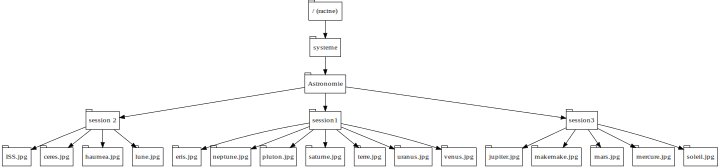

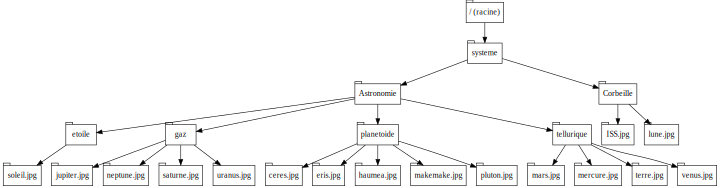

In [8]:
!rm -rf ./systeme/
!tar xf systeme.tar
!if [ ! -f deplacement.sh ]; then echo '#!/bin/sh' > deplacement.sh; fi
!chmod +x deplacement.sh
files=[]
for root, directories, filenames in os.walk('systeme'):
    for filename in filenames:
        files.append(os.path.join(root,filename))
u.activite("Déplacement de fichiers")
u.mark("En utilisant les commandes vues ci-dessus, faites passer de la première arborescence à la deuxième.")
u.mark("Vous pourrez vérifier que votre script `deplacement.sh` ")
nodes=nodesfromlist(files)
dot=treefromnodes(nodes,files)
display(dot)
files=["systeme/Astronomie/planetoide/ceres.jpg", "systeme/Astronomie/planetoide/eris.jpg", "systeme/Astronomie/planetoide/haumea.jpg", "systeme/Corbeille/ISS.jpg", "systeme/Astronomie/gaz/jupiter.jpg", "systeme/Corbeille/lune.jpg", "systeme/Astronomie/planetoide/makemake.jpg", "systeme/Astronomie/tellurique/mars.jpg", "systeme/Astronomie/tellurique/mercure.jpg", "systeme/Astronomie/gaz/neptune.jpg", "systeme/Astronomie/planetoide/pluton.jpg", "systeme/Astronomie/gaz/saturne.jpg", "systeme/Astronomie/etoile/soleil.jpg", "systeme/Astronomie/tellurique/terre.jpg", "systeme/Astronomie/gaz/uranus.jpg", "systeme/Astronomie/tellurique/venus.jpg"]
nodes=nodesfromlist(files)
dot=treefromnodes(nodes,files)
display(dot)

In [9]:
%%sh
# Compléter après la solution ce script par les instructions que vous tapez pour vérifier que tout est bien modifié.
rm -rf ./systeme/
tar xf systeme.tar
# solution
echo "systeme/Astronomie/etoile/soleil.jpg
systeme/Astronomie/gaz/jupiter.jpg
systeme/Astronomie/gaz/neptune.jpg
systeme/Astronomie/gaz/saturne.jpg
systeme/Astronomie/gaz/uranus.jpg
systeme/Astronomie/planetoide/ceres.jpg
systeme/Astronomie/planetoide/eris.jpg
systeme/Astronomie/planetoide/haumea.jpg
systeme/Astronomie/planetoide/makemake.jpg
systeme/Astronomie/planetoide/pluton.jpg
systeme/Astronomie/tellurique/mars.jpg
systeme/Astronomie/tellurique/mercure.jpg
systeme/Astronomie/tellurique/terre.jpg
systeme/Astronomie/tellurique/venus.jpg
systeme/Corbeille/ISS.jpg
systeme/Corbeille/lune.jpg" > /tmp/tempo1
HERE="$(pwd)"
# Insérez les commandes ci-dessous
sh ./deplacement.sh
# Insérez les commandes ci-dessus
cd "$HERE"
find systeme -type f | sort > /tmp/tempo2
if diff -q /tmp/tempo1 /tmp/tempo2 > /dev/null; then
    true
else
    echo "Il y a des différences !"
    diff /tmp/tempo1 /tmp/tempo2 | grep '^[<>]'|sed -e 's/>/Fichier présent mais ne devrait pas : /g;s/</Fichier absent mais devrait être présent : /g'
    echo "Il y a $(diff /tmp/tempo1 /tmp/tempo2 | grep '^[<>]'|wc -l) erreurs (un fichier mal placé compte double)"

fi



Il y a des différences !
Fichier absent mais devrait être présent :  systeme/Astronomie/etoile/soleil.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/gaz/jupiter.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/gaz/neptune.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/gaz/saturne.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/gaz/uranus.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/planetoide/ceres.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/planetoide/eris.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/planetoide/haumea.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/planetoide/makemake.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/planetoide/pluton.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/tellurique/mars.jpg
Fichier absent mais devrait être présent :  systeme/Astronomie/telluriqu

### Archivage

L'archivage de données en un fichier unique est une technique qui permet de passer d'une arborescence de fichiers à un fichier unique. L'avantage est la possibilité de transport des informations et, éventuellement, leur *compression*. Cette deuxième technique sera vue plus tard, mais elle n'est pas essentielle à la compréhension de l'archivage. Ce fichier peut ensuite être retransformé en une arborescence.

#### Le format tar
Utilisé depuis les années 80, le format tar est un
pilier du monde Unix. Il est parfaitement libre. Il
servait initialement aux sauvegardes sur bande
magnétique (tape archive).
Le format tar ne permet pas la compression,
mais la commande tar donne accès à des
programmes de compression qui permettent de
réduire la taille de l’archive. Une archive au
format tar est appelée un(e) tarball.
Le compresseur le plus connu est `gzip` dont
les fichiers compressés ont un suffixe `.gz`.
Souvent on combine les deux suffixes : une
archive compressée peut ainsi s’appeler
`textes2015.tar.gz` ou
`textes2015.tgz`.

> **Syntaxe :** `tar cf fichier.tar chemin1 [...]` permet d'archiver au format tar dans `fichier.tar` toute l'arborescence à partir de `chemin1` (et autres chemins s'il y en a plusieurs sur la ligne de commande).
> `tar tf fichier.tar` permet de lister le contenu d'une archive, et `tar xf fichier.tar` permet d'extraire les fichiers de l'archive.

#### Le format zip
Principalement utilisé pour son universalité
depuis 1986, le format zip est plus ou moins
libre (il y a des doutes sur la possibilité de
brevet sur les techniques employées). Le format
zip n’est pas uniquement caractérisé par son
extension : plusieurs autres formats de fichier
sont en fait une archive ZIP qui contient divers
documents (par exemple, un fichier docx pour
Microsoft Word est en fait un ZIP qui contient
divers fichiers XML et images).
Le format zip, en plus de l’archivage permet
aussi la compression. Les commandes
`zip` et `unzip` doivent donc permettre la
décompression.

## Récapitulatif des commandes vues dans ce chapitre

| Commande | Utilité |
|----------|---------|
| `cd`  | Permet de changer le répertoire courant |
| `pwd`  | Affiche le répertoire courant |
| `ls` | Permet de lister le contenu d'un répertoire |
| `cat` | Affiche le contenu d'un fichier texte |
| `less` | Affiche le contenu d'un fichier texte en mode paginé |
| `hexdump` | Affiche le contenu d'un fichier par la valeur de ses octets |
| `mkdir` | Permet d'obtenir le manuel d'une commande |
| `rmdir` | Vérifie une condition donnée en argument |
| `touch` | Crée un fichier vide |
| `nano` | édite un fichier (aussi `gedit`) |
| `rm` | Supprime un fichier |
| `mv` | Déplace (ou renomme) un fichier |
| `cp` | Copie (et renomme) un fichier |
| `tar`     | Permet de créer, analyser ou désarchiver une archive `tar` |
| `zip`     | Permet de créer, analyser ou désarchiver une archive `tar` |



In [10]:
u.xtoggle()

Mode interactif
